# Module 1 Final Project


## Who are we?
We are Realty Sector Consultants hired by King's Country to help them in pricing their houses based on features.

## Objectives
* Analyze the geographical data to provide in-depth information about the general market scenario. 
* Predict prices on the basis of features and location of the house.
* Weight of each feature in predicting the price of the house. 

## Data
Let's import the relevant libraries and import the data.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
plt.style.use("seaborn")

#Importing the data from "kc_house_data.csv" in the variable "kc"
kc = pd.read_csv('kc_house_data.csv', parse_dates=['date'],index_col ='id')
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Data Exploration
Now we will explore the data to identify the columns, data types, and missing and inappropriate values.

#### Our data has 20 columns with the description as follows:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [2]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), object(1)
memory usage: 3.5+ MB


##### As we can see that that there are missing values in waterfront, view and yr_renovated. We will deal with them in the data cleaning process.

In [3]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


##### There is a high variation in price from 78,000 to 7.7 millions with a mean price of around 540,000. Similarly in the sqft values. 
##### We can also conclude that features such as bedrooms, bathrooms, floors, waterfront, view, condition and grade have descrete values and can be converted to category datatype. We will deal with them in the data cleaning process

In [4]:
#Selecting bedrooms, bathrooms, floors, waterfront, view, condition and grade columns.
columns = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

#Printing the unique values in the columns
for column in columns:
    print('Unique values in', column)
    print(kc[column].unique(), '\n')
    #Changing data type to category
    kc[column] = kc[column].astype('category')

Unique values in bedrooms
[ 3  2  4  5  1  6  7  8  9 11 10 33] 

Unique values in bathrooms
[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ] 

Unique values in floors
[1.  2.  1.5 3.  2.5 3.5] 

Unique values in waterfront
[nan  0.  1.] 

Unique values in view
[ 0. nan  3.  4.  2.  1.] 

Unique values in condition
[3 5 4 1 2] 

Unique values in grade
[ 7  6  8 11  9  5 10 12  4  3 13] 



## Data Cleaning
We will analyze each column to understand if it requires data cleaning. If yes, we will employ data cleaning methods to clean the data
####  1) 'date' & 'yr_built' columns

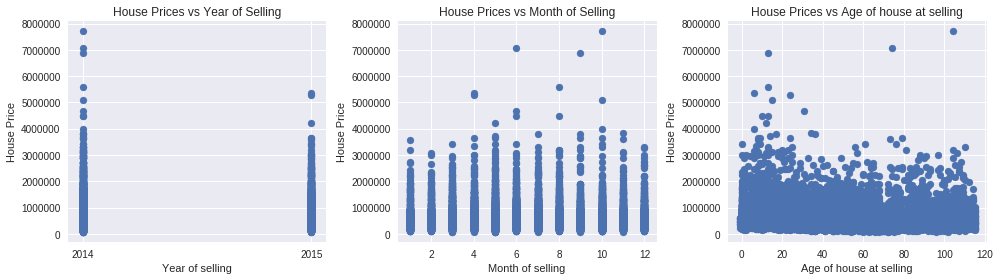

In [5]:
#Plotting year of selling, month of selling and age of house at selling. 
fig, ax = plt.subplots(1,3, figsize=(14,4))
ax[0].scatter(pd.DatetimeIndex(kc['date']).year, kc['price'])
ax[0].set_xticks(ticks= [2014,2015])
ax[0].set_xlabel('Year of selling')
ax[0].set_ylabel('House Price')
ax[0].set_title('House Prices vs Year of Selling')

ax[1].scatter(pd.DatetimeIndex(kc['date']).month, kc['price'])
ax[1].set_xlabel('Month of selling')
ax[1].set_ylabel('House Price')
ax[1].set_title('House Prices vs Month of Selling')

ax[2].scatter(pd.DatetimeIndex(kc['date']).year-kc['yr_built'],kc['price'])
ax[2].set_xlabel('Age of house at selling')
ax[2].set_ylabel('House Price')
ax[2].set_title('House Prices vs Age of house at selling')
plt.tight_layout()

plt.show()

#As there is no significant impact of year of selling, month of selling or age of house at selling,
#we will drop 'date' and 'yr_built' column and create new column 'age_at_selling'
kc['age_at_selling'] = pd.DatetimeIndex(kc['date']).year-kc['yr_built']
kc.drop(columns=['date', 'yr_built'],inplace=True)

####  2) 'price' column

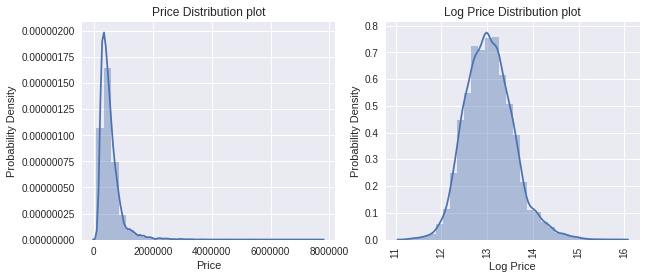

In [6]:
#Inspecting the distribution of 'price' column
fig, ax= plt.subplots(1,2, figsize=(10,4))
sns.distplot(kc['price'], bins=30, ax=ax[0])
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Price Distribution plot')
plt.xticks(rotation=90)

#As we can see that the price of the houses is right skewed. It would make sense to convert it to a log scale
kc['log_price'] = kc['price'].apply(lambda x: np.log(x))

sns.distplot(kc['log_price'], bins=30, ax=ax[1])
ax[1].set_xlabel('Log Price')
ax[1].set_ylabel('Probability Density')
ax[1].set_title('Log Price Distribution plot')
plt.xticks(rotation=90)
plt.show()

                          Log Price distribution is normal

#### 3) 'bedrooms' column

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64


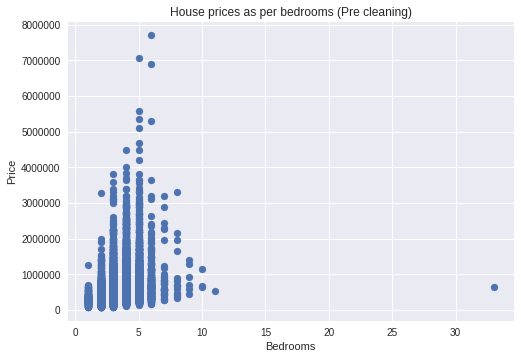

In [7]:
# Distribution of 'bedrooms'
print(kc['bedrooms'].value_counts())
plt.style.use("seaborn")
plt.scatter(kc['bedrooms'], kc['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('House prices as per bedrooms (Pre cleaning)')

#House with 33 bedrooms has a suspiciously low price. We will remove this row.
kc.drop(kc[(kc['bedrooms']==33)].index, inplace=True)

#There are 11 categories with uneven distribution. We can create new categories with a better distribution
kc['bedrooms'] = pd.cut(kc['bedrooms'], bins=[0,1,2,3,4,5,6,11])

# print(kc['bedrooms'].value_counts()) #Now we have 7 categories instead of 11

#### 4) 'bathrooms' column

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.25       2
6.50       2
6.75       2
8.00       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64
(2, 3]    9362
(1, 2]    6431
(0, 1]    3926
(3, 4]    1611
(4, 5]     223
(5, 8]      43
Name: bathrooms, dtype: int64


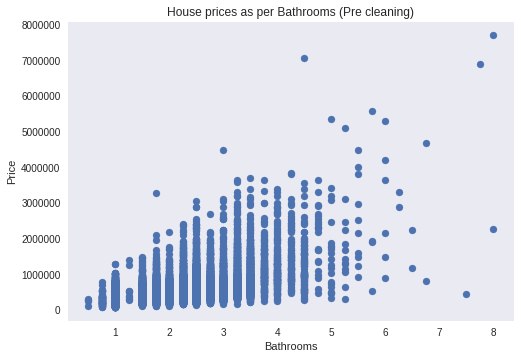

In [8]:
# Distribution of 'bathrooms'
print(kc['bathrooms'].value_counts())

#Plotting bathrooms vs prices
plt.scatter(kc['bathrooms'], kc['price'])
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('House prices as per Bathrooms (Pre cleaning)')
plt.grid(which="both")

#As we can see from the graph, median prices of the houses are increasing as the number of bathrooms increase.
#We will reduce the categories in the 'bathrooms' column
kc['bathrooms'] = pd.cut(kc['bathrooms'], bins=[0,1,2,3,4,5,8])

print(kc['bathrooms'].value_counts())

#### 5) 'sqft_living' & 'sqft_lot' column

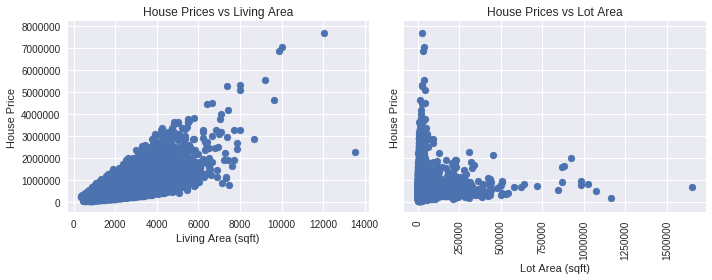

In [9]:
#Plotting Price vs Living & Lot areas
fig, ax = plt.subplots(1,2,figsize = (10,4),sharey=True)
ax[0].scatter(kc['sqft_living'],kc['price'])
ax[0].set_xlabel('Living Area (sqft)')
ax[0].set_ylabel('House Price')
ax[0].set_title('House Prices vs Living Area')
ax[1].scatter(kc['sqft_lot'],kc['price'])
ax[1].set_xlabel('Lot Area (sqft)')
ax[1].set_ylabel('House Price')
ax[1].set_title('House Prices vs Lot Area')
plt.xticks(rotation=90)
plt.tight_layout()

# As we can see that both Living Area and Lot Area have an outlier. We can remove that
kc.drop(kc[kc['sqft_living']==kc['sqft_living'].max()].index, inplace=True)
kc.drop(kc[kc['sqft_lot'] == kc['sqft_lot'].max()].index, inplace=True)

#### 6) 'floors' column

Floors categories: 
 [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]
Categories (6, float64): [1.0, 2.0, 1.5, 3.0, 2.5, 3.5]


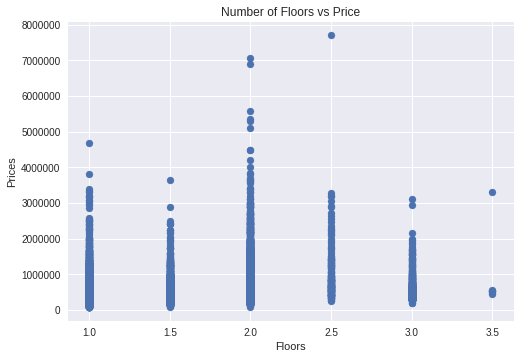

In [10]:
#No missing values in the 'floor' column
print('Floors categories: \n', kc['floors'].unique())

#plotting Number of Floors vs Price
plt.scatter(kc['floors'], kc['price'])
plt.xlabel('Floors')
plt.ylabel('Prices')
plt.title('Number of Floors vs Price')
plt.show()

#We can reduce the categories
kc['floors'] = pd.cut(kc['floors'],[0.5,1.5,2.5,3.5])

#### 7) 'waterfront' column

In [11]:
print('Unique values:', kc['waterfront'].unique(),'\n')
print('Value counts:\n',kc['waterfront'].value_counts())
# 'waterfront' column has missing values. We can fill them with 0, because more than 99% of the values are 0
kc['waterfront'].fillna(0, inplace=True)

Unique values: [NaN, 0.0, 1.0]
Categories (2, float64): [0.0, 1.0] 

Value counts:
 0.0    19072
1.0      146
Name: waterfront, dtype: int64


#### 8) 'view' column

Unique values: [0.0, NaN, 3.0, 4.0, 2.0, 1.0]
Categories (5, float64): [0.0, 3.0, 4.0, 2.0, 1.0]
0.0    19421
2.0      957
3.0      507
1.0      330
4.0      316
Name: view, dtype: int64


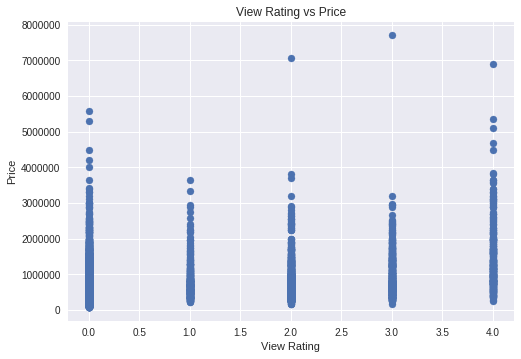

In [12]:
print('Unique values:', kc['view'].unique())
print(kc['view'].value_counts())
#As most of the values are 0, we can assume that missing values can be filled with 0
kc['view'].fillna(0,inplace=True)

#Plotting View vs Price
plt.scatter(kc['view'],kc['price'])
plt.xlabel('View Rating')
plt.ylabel('Price')
plt.title('View Rating vs Price')
plt.show()

#View values don't have a pattern of impact on price. So we will convert them into 0 and 1 (1 if view rating >0)
kc.loc[(kc['view'] != 0),'view'] = 1

#### 9) 'condition' column

Unique values: [3, 5, 4, 1, 2]
Categories (5, int64): [3, 5, 4, 1, 2]


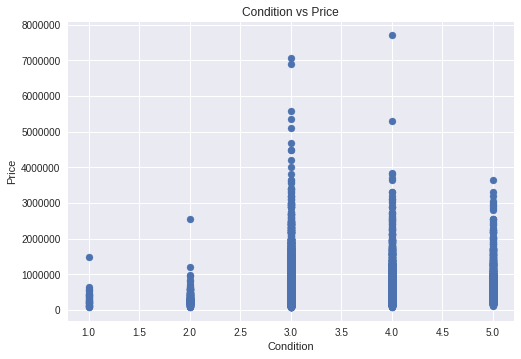

In [13]:
print('Unique values:', kc['condition'].unique())
#There are 5 categories

#Plotting Condition vs Price
plt.scatter(kc['condition'],kc['price'])
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Condition vs Price')
plt.show()

#As we can see that prices of houses with rating more than 2 command better prices.
#Converting new category (0 if condition less than 3, 1 if condition =3 and 2 if condition more than 3)
kc['condition'] = kc['condition'].apply(lambda x: 0 if x<=2 else (1 if x==3 else 2))
kc['condition'] = kc['condition'].astype('category')

#### 10) 'grade' column

Unique values: [7, 6, 8, 11, 9, ..., 10, 12, 4, 3, 13]
Length: 11
Categories (11, int64): [7, 6, 8, 11, ..., 12, 4, 3, 13]


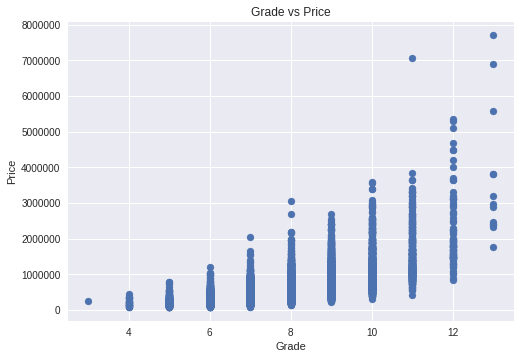

In [14]:
print('Unique values:', kc['grade'].unique())
#There are 11 categories

#Plotting Grade vs Price
plt.scatter(kc['grade'],kc['price'])
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Grade vs Price')
plt.show()

#We can reduce the number of categories
kc['grade'] = pd.cut(kc['grade'],[2,5,6,7,8,9,11,13])

#### 11) 'sqft_basement' column

0.0       12825
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
840.0        83
580.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
875.0         1
2190.0        1
417.0         1
1284.0        1
3500.0        1
2600.0        1
2250.0        1
176.0         1
20.0          1
1798.0        1
792.0         1
248.0         1
1852.0        1
1024.0        1
508.0         1
143.0         1
2240.0        1
1245.0        1
274.0         1
506.0         1
1930.0        1
1960.0        1
207.0         1
2350.0        1
295.0         1
1135.0        1
3000.0        1
915.0         1
374.0         1
1248.0        1
Name: sqft_basement, Len

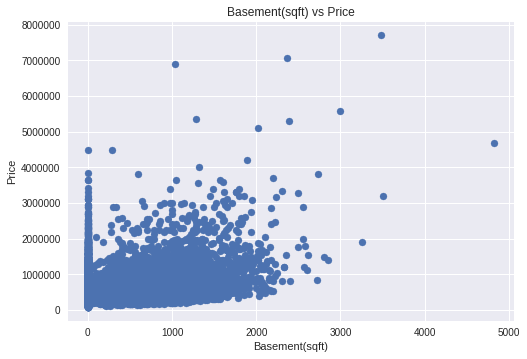

In [15]:
#There are missing values in 'sqft_basement' column
print(kc['sqft_basement'].value_counts())

#We can replace '?' with 0 as 12825 values are 0
kc.loc[kc['sqft_basement'].isin(['?']),'sqft_basement'] = 0

#Converting 'sqft_basement' column to 'int' type
kc['sqft_basement'] = kc['sqft_basement'].astype('float')

#Plotting sqft_basement vs Price
plt.scatter(kc['sqft_basement'],kc['price'])
plt.xlabel('Basement(sqft)')
plt.ylabel('Price')
plt.title('Basement(sqft) vs Price')
plt.show()

#As there is no straight forward correlation between price and sqft_basement, 
#we can convert it to 0 and 1 (1 being if there is a basement)

kc.loc[kc['sqft_basement'] != 0,'sqft_basement'] = 1

#Rename column 'sqft_basement' to 'basement'
kc.rename(columns = {'sqft_basement':'basement'}, inplace=True)
kc['basement'] = kc['basement'].astype('category')

#### 12) 'yr_renovated' column

Unique Values:[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


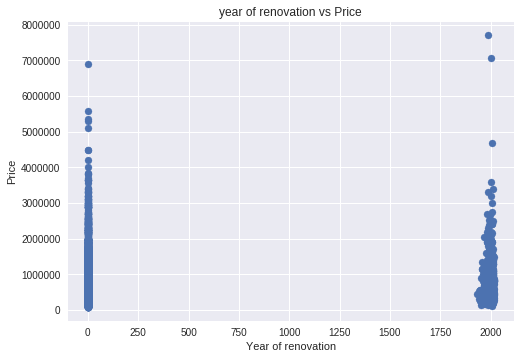

In [16]:
print(f"Unique Values:{kc['yr_renovated'].unique()}")

#There are null values in the yr_renovated column, 
#We can fill those values with 0, assuming they were never renovated
kc['yr_renovated'].fillna(0, inplace=True)

#Plotting yr_renovated vs Price
plt.scatter(kc['yr_renovated'],kc['price'])
plt.xlabel('Year of renovation')
plt.ylabel('Price')
plt.title('year of renovation vs Price')
plt.show()

#We can convert the column into a category of whether the house was renovated or not
kc['renovated'] = kc['yr_renovated'].apply(lambda x: 0 if x==0 else 1)
kc['renovated'] = kc['renovated'].astype('category')
kc.drop('yr_renovated', axis=1, inplace=True)

#### 13) 'zipcode' column

In [70]:
zipcodes = kc["zipcode"].unique()
zipcodes_dict = {}
for zipcode in zipcodes:
    mean = kc.loc[kc["zipcode"] == zipcode, "price"].mean()
    if mean <= 300000:
        zipcodes_dict[zipcode] = 0
    elif mean > 300000 and mean <= 500000:
        zipcodes_dict[zipcode] = 1
    elif mean > 500000 and mean <= 700000:
        zipcodes_dict[zipcode] = 2
    else:
        zipcodes_dict[zipcode] = 3

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

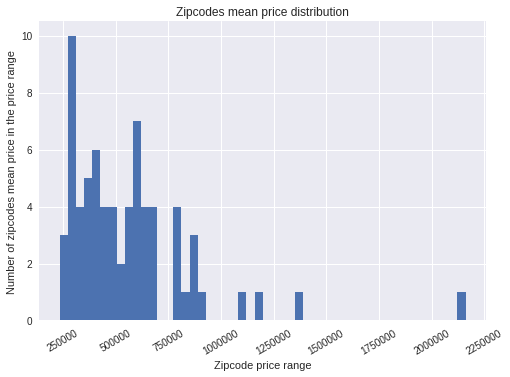

In [18]:
#Groupby zipcodes by mean prices and creating histogram
plt.hist(kc.groupby('zipcode')['price'].mean().sort_values(ascending=False), bins=50)
plt.xticks(rotation=30)
plt.xlabel('Zipcode price range')
plt.ylabel('Number of zipcodes mean price in the price range')
plt.title('Zipcodes mean price distribution')
plt.show()

#Creating new dataframe to keep mean price values per zipcode
mean_price_by_zipcode = pd.DataFrame(data = kc.groupby('zipcode')['price'].mean().sort_values(ascending=False))

#Creating bins as per mean prices
mean_price_by_zipcode['zip_mean_price'] = pd.cut(mean_price_by_zipcode['price'],
                                                        bins = [200000,300000,500000,700000,2250000])
#Dropping the price column
mean_price_by_zipcode.drop('price', axis=1, inplace=True)

#Merging with main Dataframe(kc)
kc = kc.merge(mean_price_by_zipcode,how='left',on='zipcode')

In [19]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21594 entries, 0 to 21593
Data columns (total 21 columns):
price             21594 non-null float64
bedrooms          21594 non-null category
bathrooms         21594 non-null category
sqft_living       21594 non-null int64
sqft_lot          21594 non-null int64
floors            21594 non-null category
waterfront        21594 non-null category
view              21594 non-null category
condition         21594 non-null category
grade             21594 non-null category
sqft_above        21594 non-null int64
basement          21594 non-null category
zipcode           21594 non-null int64
lat               21594 non-null float64
long              21594 non-null float64
sqft_living15     21594 non-null int64
sqft_lot15        21594 non-null int64
age_at_selling    21594 non-null int64
log_price         21594 non-null float64
renovated         21594 non-null category
zip_mean_price    21594 non-null category
dtypes: category(10), float64(4), 

##### Our data is now clean with no missing values
## Data Visualization
##### Plotting Heatmap of Lat & Long to find of areas of higher & lower prices

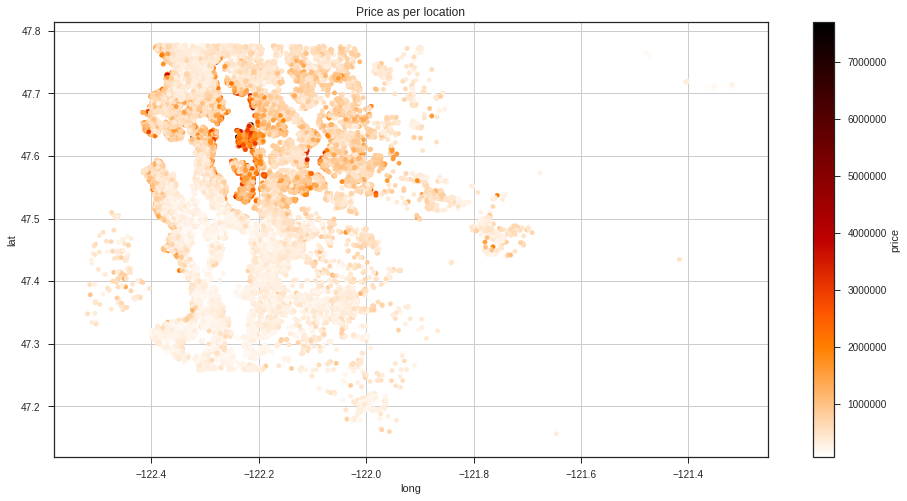

In [20]:
plt.style.use("seaborn-ticks")
kc.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", 
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Price as per location')
plt.show()

               **As we can see that the prices are highest around (-47.7, -122.2)**

##### plotting price per sqft lot to find out areas with highest price per unit of land 

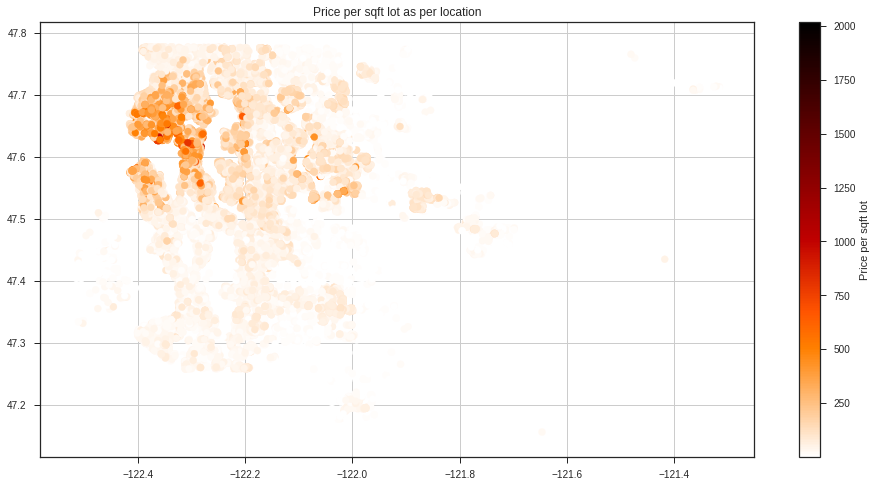

In [21]:
plt.figure(figsize=(16,8))
plt.scatter(kc['long'], kc['lat'], c=kc['price']/kc['sqft_lot'], cmap='gist_heat_r')
cbar = plt.colorbar()
cbar.set_label('Price per sqft lot')
plt.grid(which='both')
plt.title('Price per sqft lot as per location')
plt.show()

              **Areas in the darker shades will attract higher prices per sqft of land**

##### plotting price per sqft living to find out areas with highest price per unit living area

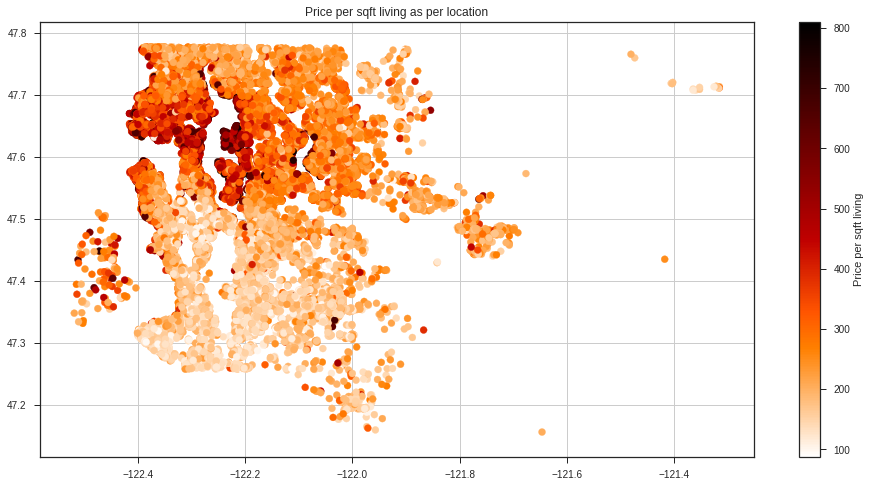

In [22]:
plt.figure(figsize=(16,8))
plt.scatter(kc['long'], kc['lat'], c=kc['price']/kc['sqft_living'], cmap='gist_heat_r')
cbar = plt.colorbar()
cbar.set_label('Price per sqft living')
plt.grid(which='both')
plt.title('Price per sqft living as per location')
plt.show()

              **Areas in the darker shades will attract higher prices per sqft of land**

## Data Transformation

In [23]:
# For the regression model, we can drop zipcode, price,lat,long columns
kc_clean = kc.drop(columns=['price', 'zipcode', 'lat', 'long'])

In [24]:
#For the categories columns, we can use label encoder to prepare them for the regression model
cat_columns = ['bedrooms', 'bathrooms', 'floors','waterfront', 'view', 'condition', 'grade', 
               'basement','renovated', 'zip_mean_price']
label=LabelEncoder()
for column in cat_columns:
    kc_clean[column] = label.fit_transform(kc_clean[column])

In [25]:
kc_clean.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,sqft_living15,sqft_lot15,age_at_selling,log_price,renovated,zip_mean_price
0,2,0,1180,5650,0,0,0,1,2,1180,0,1340,5650,59,12.309982,0,1
1,2,2,2570,7242,1,0,0,1,2,2170,1,1690,7639,63,13.195614,1,1
2,1,0,770,10000,0,0,0,1,1,770,0,2720,8062,82,12.100712,0,1
3,3,2,1960,5000,0,0,0,2,2,1050,1,1360,5000,49,13.311329,0,2
4,2,1,1680,8080,0,0,0,1,3,1680,0,1800,7503,28,13.142166,0,2


### Cluster map to show cluster features with high correlation 

In [26]:
abs(kc_clean.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,sqft_living15,sqft_lot15,age_at_selling,log_price,renovated,zip_mean_price
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False


On the above matrix we observe that *sqft_living* is highly correlated with *sqft_above* and *sqft_living15* 

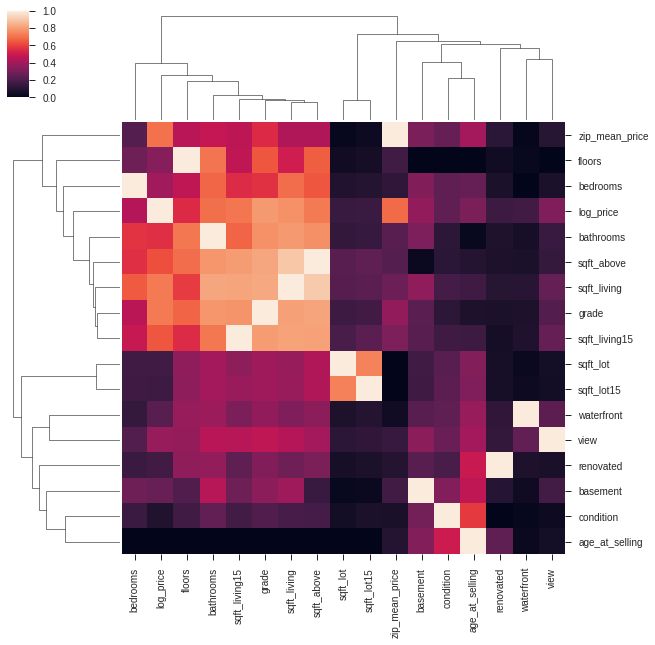

In [27]:
sns.clustermap(kc_clean.corr(), standard_scale=1)

##### We can see that bedrooms, floors, bathrooms, sqft_living15, grade, sqft_living have high correlation with log(price)

In [28]:
# We will now split the data into features and target to run the regression model
X = kc_clean.drop(columns=['log_price', 'sqft_living'])
y = kc_clean['log_price']

## Linear Regression

In [29]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

#Summary of results
results.summary()

/home/locsta/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     6278.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:20:05   Log-Likelihood:                 1349.4
No. Observations:               21594   AIC:                            -2667.
Df Residuals:                   21578   BIC:                            -2539.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5380      0.008   1380.906      0.000      11.522      11.554
bedrooms          -0.0014      0.002     -0.637      0.524      -0.006       0.003
bathrooms          0.0476      0.003     15.672      0.000       0.042       0.054
sqft_lot        4.138e-07   5.63e-08      7.346      0.000    3.03e-07    5.24e-07
floors             0.0162      0.004      3.907      0.000       0.008       0.024
waterfront         0.5339      0.020     27.264      0.000       0.496       0.572
view               0.1494      0.006     25.910      0.000       0.138       0.161
condition          0.0371      0.003     10.719      0.000       0.030       0.044
grade              0.1320      0.003     51.792      0.000       0.127       0.137
sqft_above         0.0002   4.06e-06     46.427      0.000       0.000       0.000
basement           0.1420      0.004     34.557      0.000       0.134       0.150
sqft_living15   3.389e-05   3.79e-06      8.934      0.000    2.65e-05    4.13e-05
sqft_lot15     -1.741e-07   8.33e-08     -2.091      0.037   -3.37e-07   -1.09e-08
age_at_selling     0.0030   7.94e-05     38.305      0.000       0.003       0.003
renovated          0.0441      0.009      4.932      0.000       0.027       0.062
zip_mean_price     0.2743      0.002    135.690      0.000       0.270       0.278
==============================================================================
Omnibus:                      562.949   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1187.070
Skew:                          -0.151   Prob(JB):                    1.70e-258
Kurtosis:                       4.108   Cond. No.                     6.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The bedroom feature have a P value of 0.524.
Let's drop this feature and re-run our model.

In [30]:
# We will now split the data into features and target to run the regression model
X = kc_clean.drop(columns=['log_price', 'sqft_living', 'bedrooms'])
y = kc_clean['log_price']

In [31]:
import statsmodels.api as sm

# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

#Summary of results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     6726.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:20:05   Log-Likelihood:                 1349.2
No. Observations:               21594   AIC:                            -2668.
Df Residuals:                   21579   BIC:                            -2549.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5367      0.008   1425.974      0.000      11.521      11.553
bathrooms          0.0471      0.003     16.003      0.000       0.041       0.053
sqft_lot         4.15e-07   5.63e-08      7.372      0.000    3.05e-07    5.25e-07
floors             0.0165      0.004      4.007      0.000       0.008       0.025
waterfront         0.5346      0.020     27.338      0.000       0.496       0.573
view               0.1496      0.006     25.985      0.000       0.138       0.161
condition          0.0370      0.003     10.700      0.000       0.030       0.044
grade              0.1322      0.003     52.062      0.000       0.127       0.137
sqft_above         0.0002   3.86e-06     48.618      0.000       0.000       0.000
basement           0.1415      0.004     35.033      0.000       0.134       0.149
sqft_living15   3.385e-05   3.79e-06      8.924      0.000    2.64e-05    4.13e-05
sqft_lot15     -1.719e-07   8.32e-08     -2.067      0.039   -3.35e-07   -8.86e-09
age_at_selling     0.0030   7.93e-05     38.342      0.000       0.003       0.003
renovated          0.0441      0.009      4.942      0.000       0.027       0.062
zip_mean_price     0.2744      0.002    135.966      0.000       0.270       0.278
==============================================================================
Omnibus:                      562.235   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1186.540
Skew:                          -0.150   Prob(JB):                    2.22e-258
Kurtosis:                       4.109   Cond. No.                     6.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we can see this model achieve a R-squared score of 81.4%, so dropping the feature *bedrooms* didn't affected the accuracy of our model.

This model takes a lot of feature inputs to predict the price.<br>
###### Let's see if we can build a simpler model using the features that are the most correlated with the price.

In [32]:
kc_clean.corr()['log_price'].sort_values(ascending=False)

log_price         1.000000
grade             0.696499
sqft_living       0.696177
zip_mean_price    0.677626
sqft_living15     0.619156
sqft_above        0.601676
bathrooms         0.530946
bedrooms          0.352119
view              0.328722
floors            0.285892
basement          0.208980
waterfront        0.170777
renovated         0.106592
sqft_lot          0.101497
sqft_lot15        0.091317
condition         0.015272
age_at_selling   -0.080477
Name: log_price, dtype: float64

### New model using only the most important features

#### Notice we chose only the top 3 features because *sqft_living15* and *sqft_above* are highly correlated with *sqft_living*.

In [89]:
# We will now split the data into features and target to run the regression model
X = kc_clean[['grade', 'sqft_living', 'zip_mean_price']]
y = kc_clean['log_price']
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                 2.491e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:55:04   Log-Likelihood:                -640.13
No. Observations:               21594   AIC:                             1288.
Df Residuals:                   21590   BIC:                             1320.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.8141      0.005   2415.595      0.000      11.804      11.824
grade              0.1061      0.002     44.570      0.000       0.101       0.111
sqft_living        0.0002   2.79e-06     83.541      0.000       0.000       0.000
zip_mean_price     0.3027      0.002    145.806      0.000       0.299       0.307
==============================================================================
Omnibus:                      707.520   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1588.247
Skew:                           0.190   Prob(JB):                         0.00
Kurtosis:                       4.273   Cond. No.                     6.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Review of the regression results

##### t statistic and p value

t statistic is coefficient divided by standard error. In our model, we are going to consider 5% as the acceptable p value.<br>
Anything below 5% and we will reject the null hypothesis (there is only 5% probability that the independent variable has no effect).<br>
In our distribution, we can see that none of the independent variables have p value less than 5%.<br>
So, we can't remove any of the independent variable from the dataset.

##### Coefficients & constant

The coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one, holding all the other independent variables constant.<br>
We have listed the coefficients of independent variable in the summary table.<br>
Constant is the value that the dependent variable has when all the independent variables are zero.

##### R-Squared

The R-squared is the fraction of the variation in the dependent variable that is or predicted by independent variables.<br>
In our results for our first model we have an R-squared value of 0.814.<br>
It means that 81.4% of the variation in dependent variable is predicted by independent variables.

### Comparing our different models

The second model achieve an accuracy of 77,6% compared to 81,4% for our first model.<br>
If we drop the *grade* feature from our second model we achieve an accuracy of 75,5%.<br>
While our second and third models are not as good as our first model, it's fairly close considering we only use 3 and 2 features instead of 14!<br>
Those last two models can be very useful for companies that want to quickly predict housing prices in certain areas.

#### Creating a function to predict the price based on *'sqft_living'*, *'zip_mean_price'* and *'grade'* (if available)
We use sklearn to create two models, one with using all 3 features and the other one not using the *grade* feature

In [90]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_no_grade = LinearRegression()

# X contaning the 3 features
X = kc_clean[['grade', 'sqft_living', 'zip_mean_price']]

# X contaning the only the sqft_living and zip_mean_price features
X_no_grade = kc_clean[['sqft_living', 'zip_mean_price']]

y = kc_clean['log_price']
lm.fit(X,y)
lm_no_grade.fit(X_no_grade,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
zipcodes = kc["zipcode"].unique()
zipcodes_dict = {}
for zipcode in zipcodes:
    mean = kc.loc[kc["zipcode"] == zipcode, "price"].mean()
    if mean <= 300000:
        zipcodes_dict[zipcode] = 0
    elif mean > 300000 and mean <= 500000:
        zipcodes_dict[zipcode] = 1
    elif mean > 500000 and mean <= 700000:
        zipcodes_dict[zipcode] = 2
    else:
        zipcodes_dict[zipcode] = 3

def predict(sqft_living,zipcode,grade=None):
    zipcode = zipcodes_dict[zipcode]
    if not grade:
        data = pd.DataFrame([{'sqft_living': sqft_living, 'zip_mean_price':zipcode}])
        pred = lm_no_grade.predict(data)
    else:
        if grade <= 5:
            grade = 0
        elif grade > 5 and grade <= 6:
            grade = 1
        elif grade > 6 and grade <= 7:
            grade = 2
        elif grade > 7 and grade <= 8:
            grade = 3
        elif grade > 8 and grade <= 9:
            grade = 4
        elif grade > 9 and grade <= 11:
            grade = 5
        else:
            grade = 6
        data = pd.DataFrame([{'grade': grade, 'sqft_living': sqft_living, 'zip_mean_price':zipcode}])
        pred = lm.predict(data)
    return round(np.exp(pred)[0])

#### We can now use our newly created function to have an idea of the price depending on our 3 selected features

In [92]:
predict(800,98109)

491415.0

##### A 800 square feet house in the highly sought after 98109 neighborhood would be worth around 490K$

In [93]:
predict(1200,98117, 7)

404865.0

#####  A 1200 square feet house in the less attractive 98117 neighborhood with a grade of 7 would be worth around 405K$